In [1]:
import pandas as pd

df = pd.read_csv('Results_21Mar2022.csv')

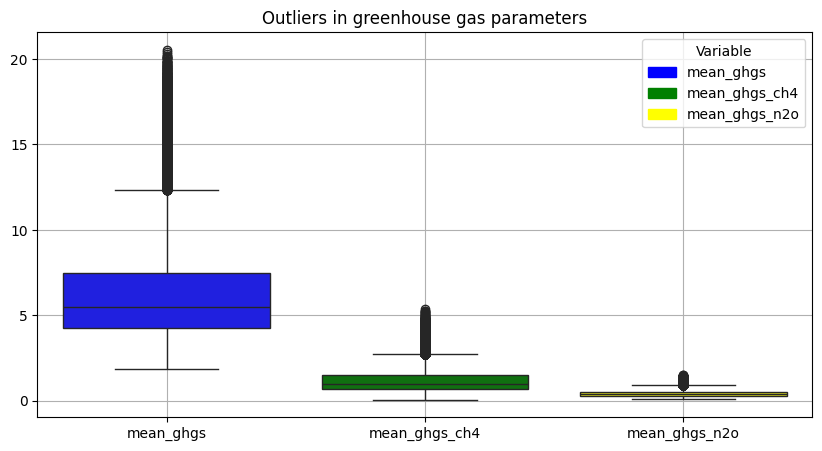

In column 'mean_ghgs', number of outliers: 4673
In column 'mean_ghgs_ch4', number of outliers: 2510
In column 'mean_ghgs_n2o', number of outliers: 4018


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['mean_ghgs','mean_ghgs_ch4','mean_ghgs_n2o']
palette = {'mean_ghgs': 'blue', 'mean_ghgs_ch4': 'green', 'mean_ghgs_n2o': 'yellow'}
plt.figure(figsize=(10,5))
sns.boxplot(data=df[columns_to_check],palette=palette)
plt.title('Outliers in greenhouse gas parameters')
plt.grid(True)
handles = [plt.Rectangle((0,0),1,1, color=palette[label]) for label in columns_to_check]
labels = columns_to_check
plt.legend(handles, labels, title="Variable")
plt.show()

outlier_info = {}
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_info[column] = {
        'outlier_values': outliers[column].values,
        'indices': outliers.index.tolist()
    }

# Output detailed information about outliers
for column, info in outlier_info.items():
    print(f"In column '{column}', number of outliers: {len(info['indices'])}")